# Import Packages and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=SettingWithCopyWarning)
pd.set_option("display.max_rows", 150)
pd.set_option('display.max_columns', 150)

In [2]:
cd Desktop\Nutrition Datasets

C:\Users\i816634\Desktop\Nutrition Datasets


In [3]:
df = pd.read_csv("en.openfoodfacts.org.products.tsv",
                       delimiter='\t',
                       encoding='utf-8')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,...,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,N

# Exploring and Data Cleaning

In [4]:
df.shape

(356027, 163)

In [5]:
df.isnull().sum(axis=0)

code                                              26
url                                               26
creator                                            3
created_t                                          3
created_datetime                                  10
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17512
generic_name                                  298313
quantity                                      236742
packaging                                     266068
packaging_tags                                266068
brands                                         29050
brands_tags                                    29070
categories                                    252728
categories_tags                               252752
categories_en                                 252726
origins                                       330977
origins_tags                                  

Quick glimpse of the missing data shows that some features have significant amount of null values (~300,000) out of 356027. Some do not even have a single value (356027). Therefore, it is completely reasonable to drop those columns.

In [6]:
df = df.dropna(axis=1,how="all")
df.shape

(356027, 147)

Another useful information from the columns is the fact that all the nutrients have the (_100g) suffix. Let's filter the nutrients and further investigate null values. 

In [7]:
for column in df.columns:
    if '_100g' in column:
        print(column + ": " + str(df[column].isnull().sum()))

energy_100g: 60660
energy-from-fat_100g: 355158
fat_100g: 76530
saturated-fat_100g: 92204
-caprylic-acid_100g: 356026
-capric-acid_100g: 356025
-lauric-acid_100g: 356023
-myristic-acid_100g: 356026
-palmitic-acid_100g: 356026
-stearic-acid_100g: 356026
-arachidic-acid_100g: 356000
-behenic-acid_100g: 356001
-montanic-acid_100g: 356026
monounsaturated-fat_100g: 332987
polyunsaturated-fat_100g: 332952
omega-3-fat_100g: 355089
-alpha-linolenic-acid_100g: 355826
-eicosapentaenoic-acid_100g: 355984
-docosahexaenoic-acid_100g: 355938
omega-6-fat_100g: 355820
-linoleic-acid_100g: 355868
-arachidonic-acid_100g: 356018
-gamma-linolenic-acid_100g: 356000
-dihomo-gamma-linolenic-acid_100g: 356001
omega-9-fat_100g: 356002
-oleic-acid_100g: 356012
-gondoic-acid_100g: 356011
trans-fat_100g: 212584
cholesterol_100g: 211857
carbohydrates_100g: 76807
sugars_100g: 76841
-sucrose_100g: 355942
-glucose_100g: 355995
-fructose_100g: 355983
-lactose_100g: 355749
-maltose_100g: 356021
-maltodextrins_100g: 356

Looks like many of the nutrient features have more than 1/2 of the values missing. Filling in the missing data with either the mean or the median is completely illogical. Therefore, we must delete these columns with significant amount of null values.

In [8]:
missing = df.isnull().sum()
droplist = []
for ind, num in enumerate(missing):
    if '_100g' in missing.index[ind]:
        if num > (1/2)*df.shape[0]:
            droplist.append(missing.index[ind])
        
df = df.drop(columns=droplist)
print(df.shape, '\n')

for column in df.columns:
    if '_100g' in column:
        print(column + ": " + str(df[column].isnull().sum()))

(356027, 70) 

energy_100g: 60660
fat_100g: 76530
saturated-fat_100g: 92204
carbohydrates_100g: 76807
sugars_100g: 76841
fiber_100g: 135344
proteins_100g: 61866
salt_100g: 66288
sodium_100g: 66333
nutrition-score-fr_100g: 101171
nutrition-score-uk_100g: 101171


We can further filter the nutrition dataset by excluding the nutrition score and the saturated fat (since the total fat includes saturated fat).

In [9]:
nutrition_features = ["energy_100g","fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
                        "salt_100g","sodium_100g"]

nutrition = df[nutrition_features]
nutrition = nutrition.dropna(axis=0).reset_index(drop=True)
print("Percentage truncated nutrition dataset: ", (round(((len(df)-len(nutrition))/len(df)*100), 2)),"%", "\n")
nutrition.head()


Percentage truncated nutrition dataset:  43.5 % 



,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,2243.0,28.57,64.29,14.29,3.6,3.57,0.00000,0.000
1,1941.0,17.86,60.71,17.86,7.1,17.86,0.63500,0.250
2,2540.0,57.14,17.86,3.57,7.1,17.86,1.22428,0.482
3,1833.0,18.75,57.81,15.62,9.4,14.06,0.13970,0.055
4,2230.0,36.67,36.67,3.33,6.7,16.67,1.60782,0.633


Not too bad, after removing all the null values, there still is an ample amount of observations to work with.

# Feature Engineering 

Since, some of the nutrition features have been discarded, let's make some adjustments for couple of the features that are included. Furthermore, we can check for any possible error in data entry. 

The carbohydrates listed above is the total carbohydrates. Sugar and fiber are both sources of carbohydrates, so let's add a feature that accounts for the remainder as "r_carbohydrates".

The 3 macronutrients that make up the total energy content are fat, protein, and carbohydrates. Let's add a variable that has the calculated energy content as "calculated_energy".

In [10]:
nutrition["calculated_energy"] = round(
    (nutrition.fat_100g*37) + 
    (nutrition.carbohydrates_100g*17) + 
    (nutrition.proteins_100g*17),
    2
)
nutrition["r_carbohydrates"] = round(nutrition.carbohydrates_100g - nutrition.sugars_100g - nutrition.fiber_100g, 2)

There is one caveat to calculated_energy. Fiber is a tricky nutrient when it comes to determining whether it factors into the total carbohydrates, and thus, the total energy. The reason for this is that poorly digested foods such as fibers do not release as much energy. Furthermore, there is the matter of insoluble vs. soluble fiber where the former is not digested at all, hence, does not contribute to any calories while the latter is first digested by our gut bacteria to make short-chain fatty acids that do somewhat provide calories (according to the FDA, 2 calories per gram).

Since, we only know about the total fiber content and not its counterparts, we will use the calculated_energy column for any analysis performed.

Errors to consider:

(1.) Any products with weight greater than 100g. 

(2.) Any features with negative values (cannot have less of something that doesn't exist in the first place).

(3.) Any products with sugar greater than total carbohydrates, since, sugar is one part of carbohydrate that contains simple and complex carbs.

(4.) Any products exceeding the max energy value of 3700 (100% fat).

(5.) Any products with sodium greater than salt, since, sodium is one part of salt that contains chloride and other trace minerals.

(6.) Any products that have a higher "energy_100g" value than the "calculated_energy" value, since, the latter counts all types of carbohydrates (fiber) as 17 kJ. 

In [11]:
negative = 0
for x in nutrition.values.flatten():
    if x < 0:
        negative += 1
if negative > 1:
    print("There are {} negative values.".format(negative))
else: 
    print("There are no negative values.")

print()
moresugar = np.where(nutrition['sugars_100g'] > nutrition['carbohydrates_100g'])
for sugar in moresugar:
    print("There are {} products with more sugar than carbohydrates.".format(len(sugar)),"\n")

overmax = nutrition.loc[nutrition.calculated_energy > 3700]
print("There are {} products that exceed the max energy (3700).".format(len(overmax)),"\n")

moresodium = np.where(nutrition['sodium_100g'] > nutrition['salt_100g'])
for sodium in moresodium:
    print("There are {} products with more sodium than salt.".format(len(sodium)),"\n")

energy = np.where(nutrition['energy_100g'] > nutrition['calculated_energy'])
for e in energy:
    print("There are {} products with more energy than they really should.".format(len(e)))

There are 18726 negative values.

There are 572 products with more sugar than carbohydrates. 

There are 70 products that exceed the max energy (3700). 

There are 0 products with more sodium than salt. 

There are 103185 products with more energy than they really should.


There is a fair amount of errors in the composition of the products in the dataset. All but the energy error should be dropped from the dataset because, for the energy error, we were able to simply recalculate the total energy by adding all the macronutrients with the one assumption that all types of carbohydrates have some contribution to energy. As for errors that exceeded the max, we do not know what is contributing to cause that error due to us dropping features that may have allowed us to recalculate (but these were mostly empty anyways) or other unknown variables.

In [12]:
nutrition = nutrition[nutrition >= 0].dropna(axis=0) # No negative values
nutrition = nutrition.loc[nutrition.carbohydrates_100g >= nutrition.sugars_100g] # Carbs must be > sugar.
nutrition = nutrition.loc[nutrition.calculated_energy <= 3700] # Max energy
nutrition = round(nutrition, 2) # Rounding all values to 2 decimal places

In [13]:
print(nutrition.shape)
nutrition.head(n=3)

(182351, 10)


,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calculated_energy,r_carbohydrates
0,2243.0,28.57,64.29,14.29,3.6,3.57,0.00,0.00,2210.71,46.40
1,1941.0,17.86,60.71,17.86,7.1,17.86,0.64,0.25,1996.51,35.75
2,2540.0,57.14,17.86,3.57,7.1,17.86,1.22,0.48,2721.42,7.19


Let us see if there indeed is a decrease in energy with increase in fiber.

LINEAR REGRESSION

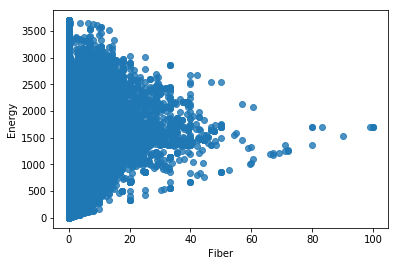

In [14]:
from sklearn.linear_model import LinearRegression

def fiber_reg():
    X = nutrition.loc[:,"fiber_100g"].values.reshape(-1,1)
    y = nutrition.loc[:,"calculated_energy"].values


    reg = LinearRegression()
    reg.fit(X,y)
    reg.predict(nutrition.loc[:,"fiber_100g"].values.reshape(-1,1))

    fig = sns.regplot(X, y, fit_reg = False)
    plt.xlabel("Fiber")
    plt.ylabel("Energy")
    plt.show()
fiber_reg()

No clear relationship is shown between fiber and energy. Other variables such as fat and proteins that contribute to total energy are masking the effect of fiber. However, the plot does show glaringly obvious outliers; 100g of fiber looks very suspicious. Even 60g of fiber is calling for further inspection.

In [15]:
nutrition[nutrition.loc[:,"fiber_100g"] >=60].head()

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calculated_energy,r_carbohydrates
8021,0.0,0.0,100.0,0.0,80.0,0.0,0.00,0.00,1700.0,20.0
8022,0.0,0.0,100.0,0.0,80.0,0.0,0.00,0.00,1700.0,20.0
28700,1255.0,0.0,90.0,0.0,90.0,0.0,0.05,0.02,1530.0,0.0
43407,837.0,0.0,60.0,0.0,60.0,0.0,1.02,0.40,1020.0,0.0
95278,347.0,0.0,100.0,0.0,83.3,0.0,0.00,0.00,1700.0,16.7


Looks like there is another error source we've overlooked. Look at the first example. There are as much fiber as the total carbohydrate, but the energy is very high! Even if we assumed earlier that all fiber will count as calories, if 99% of the total carbohydrate is fiber, the energy content should be realistically much lower. Also, there are products that have 0 energy which is impossible. 

In [16]:
badfiber = list(nutrition.query("fiber_100g == carbohydrates_100g and carbohydrates_100g != 0").index)
badenergy = list(nutrition.query("carbohydrates_100g == 0").index)
dropindex = badfiber + badenergy
nutrition = nutrition.drop(index=dropindex)

# Clustering 

Before any analysis, let's see which products appear the most using word cloud.

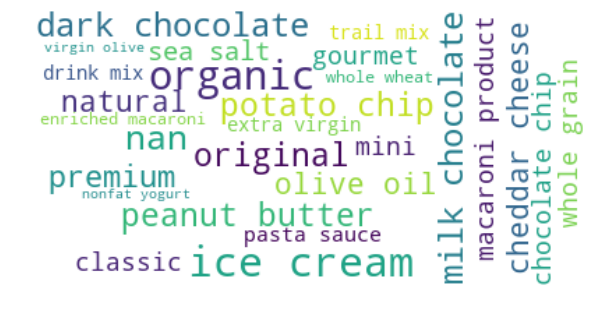

In [17]:
from wordcloud import WordCloud, STOPWORDS

stopwords=set(STOPWORDS)
nutrition["product"] = df.loc[nutrition.index, "product_name"] 
                                  
def cloudword(df):
    item = df["product"].apply(lambda l: str(l).lower().strip().split(','))
    df_item = item.apply(pd.Series).stack().reset_index(drop=True)
    text = " ".join(w for w in df_item)

    wordcloud = WordCloud(
        background_color="white",
        max_words = 30,
        max_font_size=30,
        min_font_size = 10
                         ).generate(text)

    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.axis("off")
    plt.show()
cloudword(nutrition)

Look's like there are a lot of unknown products (represented by 'nan')! Get rid of those.

In [18]:
nullindex = nutrition[nutrition["product"].isna()].index
nutrition = nutrition.drop(index=nullindex)

In [19]:
nutrition["product"].value_counts().head()

Ice Cream                 354
Potato Chips              259
Extra Virgin Olive Oil    233
Premium Ice Cream         206
Beef Jerky                143
Name: product, dtype: int64

At first glimpse, one may notice the "inconsistency" of the results from the wordcloud and the value counts of the products. The reason for this is that a product may or may not have a unique name. What this means is that, even though "Potato Chips" appears 260 times in the dataset, taking dark chocolate as an example, that word may appear more than "Potato Chips" in the whole dataset BUT included in a unique name. Take a look at the code below. The results shows that the word "dark chocolate" appears more than "potato chips".

In [20]:
ice_cream = 0
dark_chocolate = 0
potato_chips = 0
for item in (nutrition["product"].astype(str)):
    if 'ice cream' in item.lower():
        ice_cream += 1
    elif 'dark chocolate' in item.lower():
        dark_chocolate += 1
    elif 'potato chips' in item.lower():
        potato_chips += 1

print("Value counts\n")
print("Ice cream:",ice_cream)
print("Dark chocolate:",dark_chocolate)
print("Potato chips:",potato_chips)

Value counts

Ice cream: 2789
Dark chocolate: 1775
Potato chips: 1458


In [21]:
from scipy import stats

threshold = 3
z = np.abs(stats.zscore(nutrition.loc[:,"fat_100g":"r_carbohydrates"]))
loc = np.where(z>3)

SPLITTING DATASET

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

train, test = train_test_split(nutrition, test_size = 0.3, random_state=42)

X_train = train.loc[:,"fat_100g":"r_carbohydrates"].values # Dropped the original energy column.
X_test = test.loc[:,"fat_100g":"r_carbohydrates"].values
y_train = train.loc[:,"product"]
y_test = test.loc[:,"product"]

# minmax = MinMaxScaler()
# X_train = minmax.fit_transform(X_train)
# X_test = minmax.fit_transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

KMEANS - HARD ASSIGNMENT

In [23]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_clusters':np.arange(1,16),
    'init':['k-means++'],
    'random_state':[42],
    'algorithm':['full']
}
gs = GridSearchCV(
    estimator=KMeans(),
    param_grid=grid_params,
    cv=5
)
gs_results = gs.fit(X_train)
print("Best estimator:\n ",gs_results.best_estimator_)

Best estimator:
  KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)


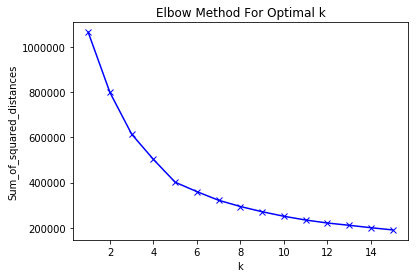

In [24]:
sumsq = []
K = range(1,16)
for k in K:
    km = KMeans(k)
    km = km.fit(X_train)
    sumsq.append(km.inertia_)

plt.plot(K, sumsq, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The Grid Search showed that the more cluster the better, however, notice how the Elbow graph starts to plateau after 6 clusters. 12-14 clusters certainly does not have much difference in sum of squared distances. For sake of interpretation and model complexity, 6 clusters will suffice.

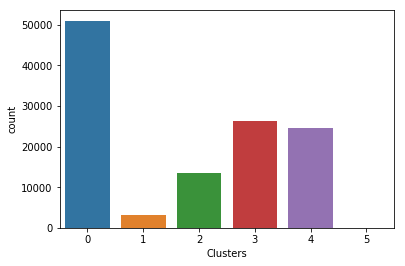

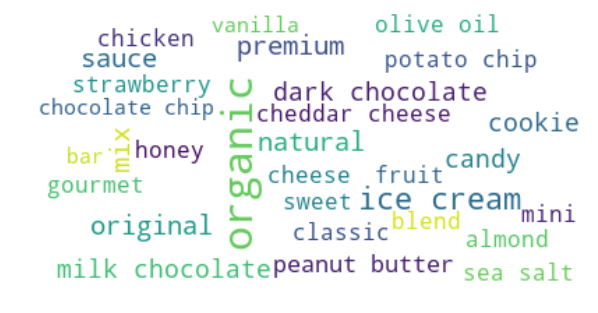

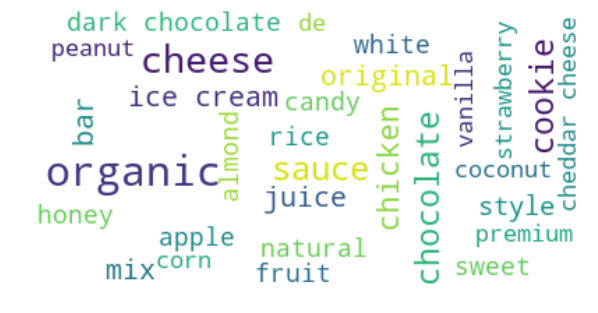

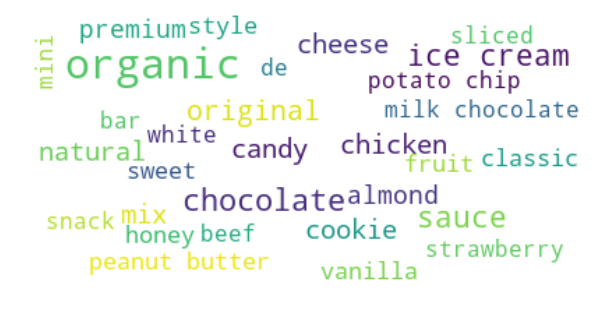

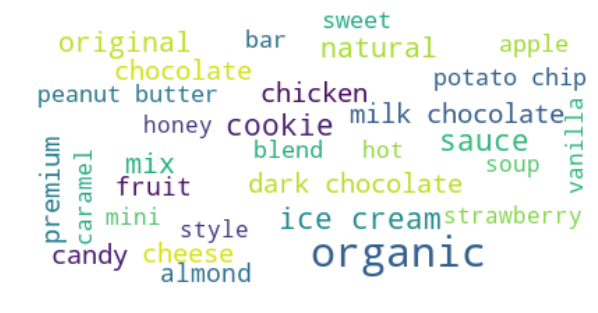

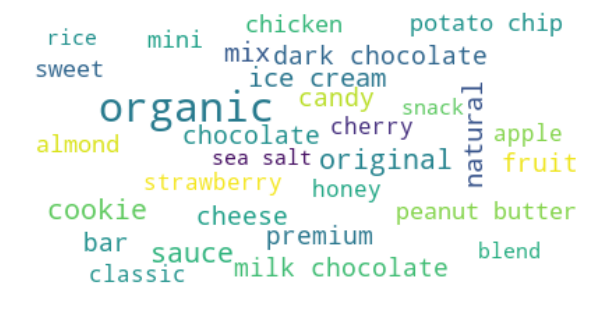

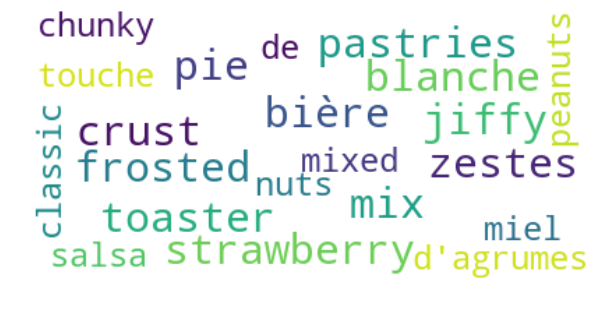

In [25]:
kmeans = KMeans(
    algorithm='full', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0
)
kmeans= kmeans.fit(X_train)

train_kmeans = train.copy()
test_kmeans = test.copy()

train_kmeans["clusters"] = kmeans.predict(X_train)
test_kmeans["clusters"] = kmeans.predict(X_test)

sns.countplot(train_kmeans.clusters.values)
plt.xlabel("Clusters")

num_clusters = 6

for x in range(num_clusters):
    cloudword(train_kmeans[train_kmeans["clusters"]==x])
    

GAUSSIAN MIXTURE MODEL - SOFT ASSIGNMENT

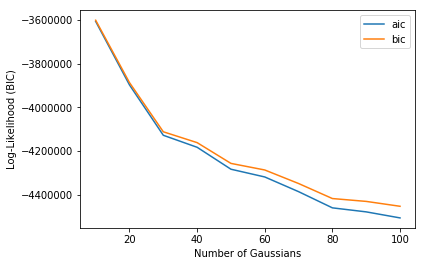

In [26]:
from sklearn.mixture import GaussianMixture

aic_train = np.zeros(10)
bic_train = np.zeros(10)

components = range(10,110,10) 

for ind, com in enumerate(components):
    
    gmm = GaussianMixture(
    n_components = com,
    covariance_type = "full",
    n_init = 1,
    random_state=42
)
    gmm.fit(X_train)
    aic_train[ind]=gmm.aic(X_train)
    bic_train[ind]=gmm.bic(X_train)
    
    
fig, ax = plt.subplots()
ax.plot(components, aic_train, label='aic')
ax.plot(components, bic_train, label='bic')
ax.set_xlabel("Number of Gaussians")
ax.set_ylabel("Log-Likelihood (BIC)")
plt.legend()
plt.show()

In [27]:
gmm = GaussianMixture(
    n_components = 25,
    covariance_type = "full",
    n_init = 1,
    random_state=42
).fit(X_train)

X_train_gmm = X_train.copy()
X_test_gmm = X_test.copy()

train_gmm = train.copy()
test_gmm = test.copy()

train_gmm["clusters"] = gmm.predict(X_train_gmm)
test_gmm["clusters"] = gmm.predict(X_test_gmm)

print("Converged: ",gmm.converged_,"\n")
print("Number of steps used to reach convergence: ",gmm.n_iter_,"\n")

Converged:  True 

Number of steps used to reach convergence:  64 



In [28]:
posteriorprobability = np.round(gmm.predict_proba(X_train_gmm), 2)
clusters_gmm = train_gmm.clusters.values
certainty = np.zeros(clusters_gmm.shape[0])

for x in range(len(clusters_gmm)):
    certainty[x] = posteriorprobability[x, clusters_gmm[x]]
train_gmm["certainty"] = certainty

# Percentage of certainty.
percentages = [.50,.75,.90]
for percent in percentages:
    print("Below {}%:".format(percent*100),round(len(train_gmm[train_gmm["certainty"] <= percent])/len(train_gmm),2))
    print("Above {}%:".format(percent*100),round(len(train_gmm[train_gmm["certainty"] > percent])/len(train_gmm),2))
    print()

Below 50.0%: 0.02
Above 50.0%: 0.98

Below 75.0%: 0.13
Above 75.0%: 0.87

Below 90.0%: 0.25
Above 90.0%: 0.75



Our model is at least 50% certain for 98% of the all the datasets each observation assigned to each cluster! Even at 90% or above, at least 75% of all observations are at least 90% certain! 

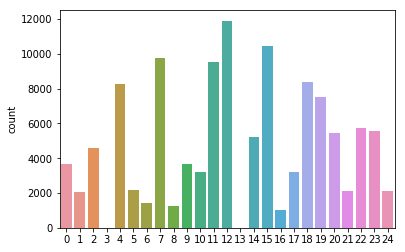

In [29]:
sns.countplot(train_gmm.clusters.values)
plt.show()

In [30]:
clusterrange = range(0,25)
for x in clusterrange:
    print("Cluster {}".format(x))
    print(train_gmm["product"][train_gmm["clusters"] == x].value_counts().head())
    print()

Cluster 0
Ice Cream       8
Pinto Beans     7
Black Beans     6
Potato Chips    6
Salsa           6
Name: product, dtype: int64

Cluster 1
Maraschino Cherries     5
Ice Cream               3
Sharp Cheddar Cheese    3
Cupcake                 3
Italian Dry Salame      3
Name: product, dtype: int64

Cluster 2
Ice Cream       19
Potato Chips     6
Trail Mix        6
Cookies          6
Mixed Nuts       5
Name: product, dtype: int64

Cluster 3
Toaster Pastries, Frosted Strawberry    1
Jiffy, Pie Crust Mix                    1
Chunky Classic Salsa                    1
Name: product, dtype: int64

Cluster 4
Ice Cream               18
Premium Ice Cream       14
Potato Chips            13
Creamy Peanut Butter    12
Tomato Ketchup          12
Name: product, dtype: int64

Cluster 5
Mixed Vegetables                  4
Applesauce                        4
Parmesan Cheese                   3
Tomato Sauce                      3
Organic Extra Virgin Olive Oil    3
Name: product, dtype: int64

Cluster 6


Turns out ice cream is a common product that is present in multiple clusters. One would ask the question, "Why not all ice cream in 1 cluster?" The reason is that these "ice cream" product may have different nutritional composition or even be just a part of a particular dish that includes ice cream. 


The kmeans word clouds had the same result as well; 5 of the 6 clusters showed the prominence of ice cream for those clusters. Remember, the word clouds are created based on how many times a particular word is present in each of the cluster, not by the nutritional features. 


So these clusters are clusterized based on the nutritional values. 


Also, outliers or data entry errors by the user may be some of the possible reasons why the clusters with 'ice cream' are different.

In [31]:
count = 0
for x,y in enumerate(train_gmm["product"]):
    if 'ice cream' in y.lower():
        print(train_gmm["product"].iloc[x],'\n')
        print(train_gmm.iloc[x],'\n\n')
        count += 1
        if count == 3:
            break

Ice Cream 

energy_100g                 747
fat_100g                   12.5
carbohydrates_100g          6.5
sugars_100g                 1.7
fiber_100g                  3.5
proteins_100g               7.5
salt_100g                  6.25
sodium_100g                2.46
calculated_energy         700.5
r_carbohydrates             1.3
product               Ice Cream
clusters                     21
certainty                  0.93
Name: 167988, dtype: object 


Ice Cream Bars 

energy_100g                     1107
fat_100g                        15.6
carbohydrates_100g              26.7
sugars_100g                     26.2
fiber_100g                       0.1
proteins_100g                    4.4
salt_100g                       0.21
sodium_100g                     0.08
calculated_energy             1105.9
r_carbohydrates                  0.4
product               Ice Cream Bars
clusters                          20
certainty                          1
Name: 161461, dtype: object 


Really Cream

If we compare these 3 different ice cream products, we can identify the difference in the nutritional values. All three are highly certain that they do in fact belong in the corresponding clusters with its own distribution (remember, gmm is fundamentally an algorithm for density estimation). Nevermind the micronutrients. Based on just the macronutrients, the difference is striking. Therefore, the clusters should be the same.

In [32]:
icecream_clusters = [21,20,7]
for cluster in icecream_clusters:
    print("CLUSTER {}".format(cluster))
    print(train_gmm[train_gmm["clusters"]==cluster].describe(),'\n')

CLUSTER 21
       energy_100g     fat_100g  carbohydrates_100g  sugars_100g   fiber_100g  \
count  2116.000000  2116.000000         2116.000000  2116.000000  2116.000000   
mean   1315.958885    11.954773           34.731181    22.420487     3.337136   
std     544.995352    12.790330           22.767141    20.296362     3.346354   
min       0.000000     0.000000            0.500000     0.000000     0.000000   
25%     975.000000     2.780000           18.000000     5.880000     0.000000   
50%    1314.000000     7.400000           28.570000    17.860000     2.900000   
75%    1644.000000    17.860000           50.000000    33.330000     5.800000   
max    3899.000000    75.000000          136.000000   134.000000    23.300000   

       proteins_100g    salt_100g  sodium_100g  calculated_energy  \
count    2116.000000  2116.000000  2116.000000        2116.000000   
mean       19.174296     2.565175     1.009669        1358.719679   
std        19.922826     1.876221     0.738876      

I tried both the kmeans and gmm just for comparison purposes. Generally, kmeans is easy to apply and converge quickly, thus is also computationally faster than other EM (Expectation-Maximization) algorithms. However, since, kmeans is hard assignment and this may lead to overfitting especially when the cluster shape, size, and density are different, it is not the most optimal method of grouping observations especially when the clusters are not circular/spherical. Clustering via kmeans is done by minimizing the distance between the sample and the centroid, and at particular point, determine that an observation belongs to a particular cluster.


On the other hand, gmm works well with different sizes and densities, since, it does not assume clusters to have any particular shape. For the dataset we are working with, we do not know which "type of food or department" each product belongs to, therefore, the data distribution is unknown (shape of the data is also unknown). Therefore, it would be more reasonable to calculate the probability that an observation belongs to a cluster and, subsequently, assign to a cluster after maximizing the likelihood. However, since we are dealing with probability, there may or may not be some degree of uncertainty.

# Anomalies

As mentioned before, there are bound to be outliers due to user error or products that naturally vary in nutrition. The ice cream example above showed this.

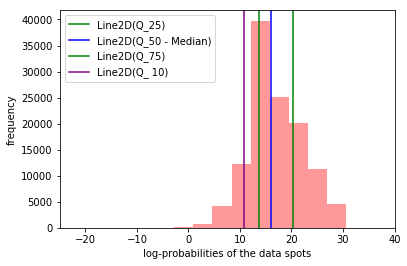

In [33]:
gmm_logprob = gmm.score_samples(X_train_gmm)
threshold = 0.1

sns.distplot(gmm_logprob, kde=False, bins=50, color="Red")
g1 = plt.axvline(np.quantile(gmm_logprob, 0.25), color="Green", label="Q_25")
g2 = plt.axvline(np.quantile(gmm_logprob, 0.5), color="Blue", label="Q_50 - Median")
g3 = plt.axvline(np.quantile(gmm_logprob, 0.75), color="Green", label="Q_75")
g4 = plt.axvline(np.quantile(gmm_logprob, threshold), color="Purple", label="Q_ %i" % (int(threshold*100)))
handles = [g1, g2, g3, g4]
plt.xlabel("log-probabilities of the data spots")
plt.xlim((-25,40))
plt.ylabel("frequency")
plt.legend(handles) 
plt.show()

In [34]:
def outliers(log_prob, threshold):
    epsilon = np.quantile(log_prob, threshold)
    outliers = np.where(log_prob <= epsilon, 1, 0)
    return outliers 

train_gmm["anomaly"] = outliers(gmm_logprob, threshold)
train_gmm[train_gmm["anomaly"] == 1].head()

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calculated_energy,r_carbohydrates,product,clusters,certainty,anomaly
46280,1464.0,10.0,75.00,25.00,22.5,5.00,0.57,0.22,1730.00,27.50,Red Kidney Beans,2,0.99,1
100566,280.0,0.0,6.67,0.00,0.0,6.67,17.27,6.80,226.78,6.67,"Gourmet Spreadable Cheese, Garlic & Herb",16,0.99,1
38884,1494.0,0.0,75.00,3.57,7.1,7.14,5.44,2.14,1396.38,64.33,Sliced Yellow Cling Peaches In Light Syrup,18,0.98,1
182211,1533.0,10.1,44.00,17.80,21.7,14.00,0.03,0.01,1359.70,4.50,Setas nameko,2,0.63,1
44433,1523.0,10.1,51.52,23.23,2.0,16.16,1.54,0.61,1524.26,26.29,Homestyle Egg Noodles,2,0.87,1


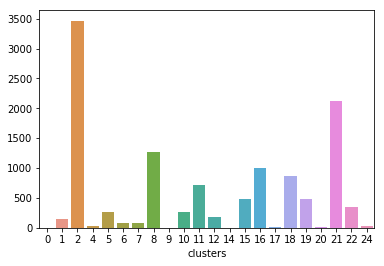

In [35]:
anomalies = train_gmm.groupby("clusters").anomaly.value_counts()
anomalies_cl = anomalies[:,1]

sns.barplot(x=anomalies_cl.index, y = anomalies_cl.values)
plt.show()

It looks like Cluster 2 and 21 holds the majority of anomalies.

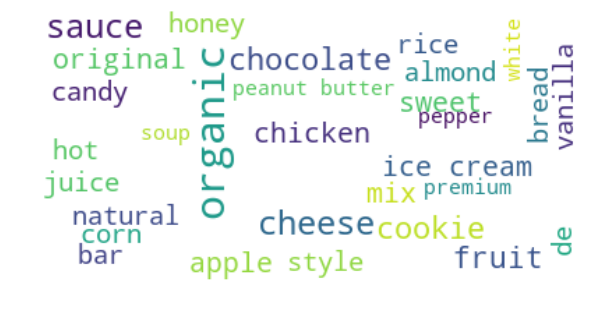

        energy_100g  fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
46280        1464.0      10.0               75.00        25.00        22.5   
182211       1533.0      10.1               44.00        17.80        21.7   
44433        1523.0      10.1               51.52        23.23         2.0   
69999        2243.0      25.0               53.57        35.71         7.1   
191680       1712.0      12.0               58.00        11.00        16.0   

        proteins_100g  salt_100g  sodium_100g  calculated_energy  \
46280            5.00       0.57         0.22            1730.00   
182211          14.00       0.03         0.01            1359.70   
44433           16.16       1.54         0.61            1524.26   
69999           17.86       0.32         0.12            2139.31   
191680           9.00       0.32         0.13            1583.00   

        r_carbohydrates                                            product  \
46280             27.50                     

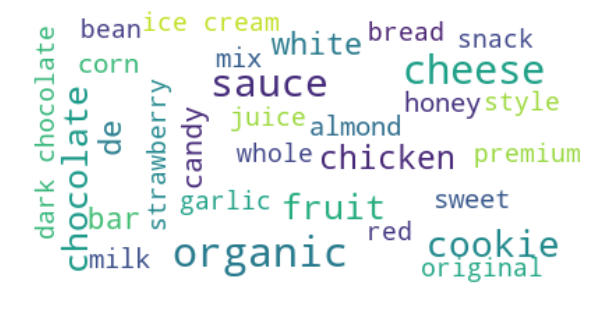

        energy_100g  fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
167988        747.0     12.50                6.50         1.70         3.5   
12228        1795.0     25.00               14.29        14.29         0.0   
136685        986.0     12.00               17.00        15.00         1.7   
97266        1452.0     16.33               46.17        22.67         6.7   
127658       1117.0     10.00               23.33         0.00         6.7   

        proteins_100g  salt_100g  sodium_100g  calculated_energy  \
167988           7.50       6.25         2.46             700.50   
12228           35.71       4.81         1.89            1775.00   
136685          14.00       0.97         0.38             971.00   
97266            9.50       0.01         0.00            1550.60   
127658          23.33       0.81         0.32            1163.22   

        r_carbohydrates                                        product  \
167988             1.30                         

In [36]:
anomaly_clusters = [2,21]

for x in anomaly_clusters:
    cloudword(train_gmm[train_gmm["clusters"]==x])
    print(train_gmm[(train_gmm["anomaly"] == 1)&(train_gmm["clusters"]==x)].head())

# Conclusion

We were able to perform clustering methods to determine whether we could accurately group foods with similar nutrient profile. Couple things to note:

•	For a dataset this large, it is crucial to account for null values and inaccurate data via feature engineering; this        includes recalculating the values if possible, standardizing the dataset, and scaling.

•	Choosing the number of clusters changes drastically depending on which method of clustering you use. GMM offers more flexibility while Kmeans brings more bias but relaxes computation.

•	The anomaly clusters with outliers, user error, and rare products encourage further investigation, especially for products that have 0 as one of their nutrient value. Also, additionally data cleaning is required.


